/Users/daihonda/.pyenv/versions/3.10.0/lib/python3.10/site-packages/matplotlib/animation.py:892: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you output the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


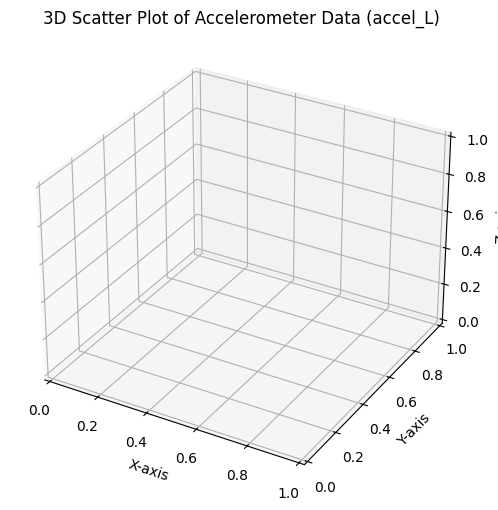

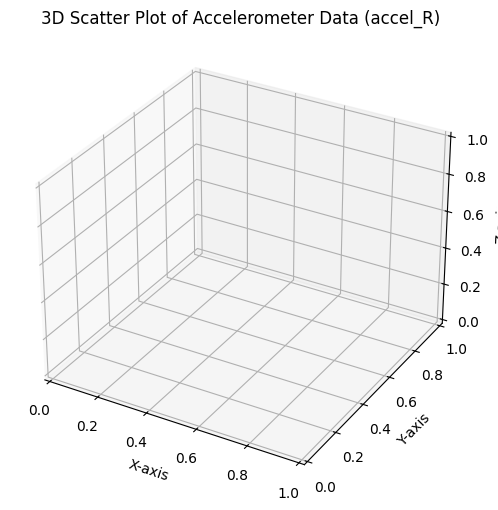

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import Normalize

# Load data from CSV files
accel_L_data = pd.read_csv('accel_L.csv')
accel_R_data = pd.read_csv('accel_R.csv')

# Extract time and XYZ coordinates
time_L = accel_L_data['Time'].values
xyz_L = accel_L_data[['x', 'y', 'z']].values

time_R = accel_R_data['Time'].values
xyz_R = accel_R_data[['x', 'y', 'z']].values

downsample_rate = 2  # Only take every 2nd data point
xyz_L_downsampled = xyz_L[::downsample_rate]
xyz_R_downsampled = xyz_R[::downsample_rate]

# Normalize time for color mapping
norm_L = Normalize(time_L.min(), time_L.max())
norm_R = Normalize(time_R.min(), time_R.max())

# Initialize plot for accel_L
fig_L = plt.figure(figsize=(10, 6))
ax_L = fig_L.add_subplot(111, projection='3d')
ax_L.set_xlabel('X-axis')
ax_L.set_ylabel('Y-axis')
ax_L.set_zlabel('Z-axis')
ax_L.set_title('3D Scatter Plot of Accelerometer Data (accel_L)')

# Initialize plot for accel_R
fig_R = plt.figure(figsize=(10, 6))
ax_R = fig_R.add_subplot(111, projection='3d')
ax_R.set_xlabel('X-axis')
ax_R.set_ylabel('Y-axis')
ax_R.set_zlabel('Z-axis')
ax_R.set_title('3D Scatter Plot of Accelerometer Data (accel_R)')

# Animation update function for accel_L
def update_L(num):
    ax_L.clear()
    ax_L.scatter(xyz_L[:num, 0], xyz_L[:num, 1], xyz_L[:num, 2], c=time_L[:num], cmap='RdYlGn', marker='o')

# Animation update function for accel_R
def update_R(num):
    ax_R.clear()
    ax_R.scatter(xyz_R[:num, 0], xyz_R[:num, 1], xyz_R[:num, 2], c=time_R[:num], cmap='RdYlGn', marker='x')

# Create animations
ani_L = FuncAnimation(fig_L, update_L, frames=len(time_L), interval=50, repeat=True)
ani_R = FuncAnimation(fig_R, update_R, frames=len(time_R), interval=50, repeat=True)

plt.show()


In [3]:
from matplotlib.animation import PillowWriter

# After creating the animation object, save it as a GIF
ani_L.save('animation_L.gif', writer=PillowWriter(fps=20))
ani_R.save('animation_R.gif', writer=PillowWriter(fps=20))


KeyboardInterrupt: 